# Modèle de données pour noSQL

## 1. Objectif du modèle de données NoSQL
Le but principal est de **stocker efficacement des données semi-structurées et non structurées** tout en offrant une grande flexibilité pour les requêtes, la gestion des relations entre les documents, et une intégration fluide avec les systèmes OLTP et OLAP. Le modèle NoSQL doit pouvoir prendre en charge une variété de données, y compris les logs de transactions, les interactions utilisateurs, et les caractéristiques de machine learning (ML).

In [ ]:
{
  "transactions": {
    "_id": "ObjectId()",
    "transaction_id": "string",
    "customer_id": "string",
    "merchant_id": "string",
    "date": {
      "date": "ISODate",
      "year": "int",
      "month": "int",
      "day": "int"
    },
    "amount": "decimal",
    "currency": {
      "currency_code": "string",
      "exchange_rate": "decimal"
    },
    "fraud_score": "float",
    "status": "string",
    "location": {
      "country_code": "string",
      "city": "string"
    },
    "payment_method": {
      "type": "string",
      "provider": "string"
    },
    "device": {
      "type": "string",
      "operating_system": "string"
    },
    "logs": [{
      "timestamp": "ISODate",
      "log_message": "string",
      "severity": "string"
    }],
    "interaction_data": {
      "session_id": "string",
      "clickstream": [{
        "timestamp": "ISODate",
        "page": "string",
        "action": "string",
        "element": "string"
      }]
    },
    "machine_learning_features": {
      "total_transactions": "int",
      "average_transaction_value": "decimal",
      "fraud_score": "float",
      "session_duration": "int",
      "prediction": "string",
      "model_score": "float"
    }
  },
  "customer_feedback": {
    "_id": "ObjectId()",
    "feedback_id": "string",
    "customer_id": "string",
    "merchant_id": "string",
    "timestamp": "ISODate",
    "rating": "int",
    "review": "string",
    "survey_responses": [{
      "question": "string",
      "answer": "string"
    }]
  },
  "merchants": {
    "_id": "ObjectId()",
    "merchant_id": "string",
    "merchant_name": "string",
    "merchant_category": "string",
    "contact_info": {
      "email": "string",
      "phone": "string"
    }
  },
  "products": {
    "_id": "ObjectId()",
    "product_id": "string",
    "merchant_id": "string",
    "product_name": "string",
    "category": "string",
    "price": "decimal"
  },
  "country_region_codes": {
    "_id": "ObjectId()",
    "country_code": "string",
    "country_name": "string",
    "region": "string"
  },
  "currency_exchange_rates": {
    "_id": "ObjectId()",
    "currency_code": "string",
    "currency_name": "string",
    "exchange_rate_to_usd": "decimal"
  },
  "error_logs": {
    "_id": "ObjectId()",
    "log_id": "string",
    "timestamp": "ISODate",
    "transaction_id": "string",
    "severity": "string",
    "message": "string",
    "error_code": "string",
    "merchant_id": "string",
    "device_id": "string",
    "location": {
      "country_code": "string",
      "city": "string"
    }
  },
  "machine_learning_features": {
    "_id": "ObjectId()",
    "model_id": "string",
    "customer_id": "string",
    "session_id": "string",
    "features": {
      "total_transactions": "int",
      "average_transaction_value": "decimal",
      "fraud_score": "float",
      "session_duration": "int"
    },
    "prediction": "string",
    "model_score": "float"
  }
}


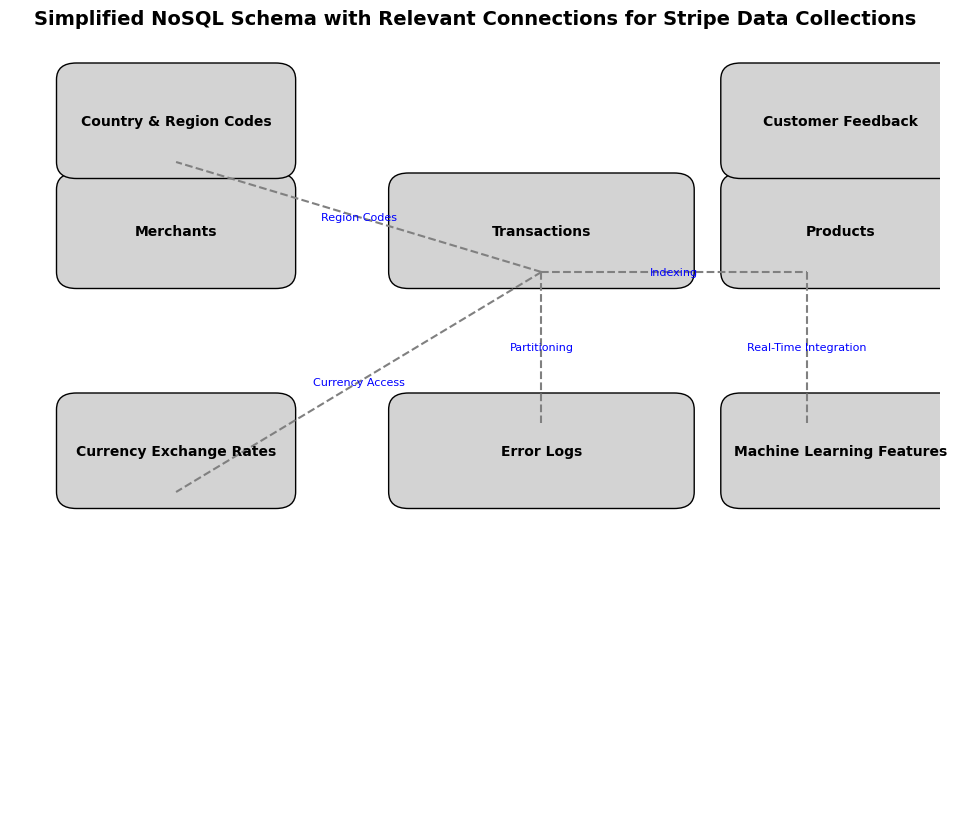

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D

def draw_box(ax, xy, width, height, label):
    """Helper function to draw labeled boxes for collections."""
    box = FancyBboxPatch(xy, width, height, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray")
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, label, ha="center", va="center", fontsize=10, fontweight="bold")

def draw_line(ax, start, end, label=None):
    """Helper function to draw connecting lines with optional labels for improvements."""
    line = Line2D([start[0], end[0]], [start[1], end[1]], linewidth=1.5, color="gray", linestyle="--")
    ax.add_line(line)
    if label:
        ax.text((start[0] + end[0]) / 2, (start[1] + end[1]) / 2, label, ha="center", va="center", fontsize=8, color="blue")

# Initialize the plot with extra spacing between collections for clarity
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0, 14)
ax.set_ylim(0, 14)
ax.axis("off")

# Define positions for each collection with improved spacing and without unnecessary connections
layout = {
    "Transactions": (6, 10, 4, 1.5),
    "Error Logs": (6, 6, 4, 1.5),
    "Merchants": (1, 10, 3, 1.5),
    "Products": (11, 10, 3, 1.5),
    "Customer Feedback": (11, 12, 3, 1.5),
    "Country & Region Codes": (1, 12, 3, 1.5),
    "Currency Exchange Rates": (1, 6, 3, 1.5),
    "Machine Learning Features": (11, 6, 3, 1.5)
}

# Draw boxes for each collection
for label, (x, y, w, h) in layout.items():
    draw_box(ax, (x, y), w, h, label)

# Draw only necessary connecting lines with annotations for key improvements
draw_line(ax, (8, 10), (8, 7.25), "Partitioning")             # Transactions to Error Logs
draw_line(ax, (8, 10), (12, 10), "Indexing")                  # Transactions to Products
draw_line(ax, (8, 10), (2.5, 12), "Region Codes")             # Transactions to Country & Region Codes
draw_line(ax, (8, 10), (2.5, 6), "Currency Access")           # Transactions to Currency Exchange Rates
draw_line(ax, (12, 10), (12, 7.25), "Real-Time Integration")  # Products to Machine Learning Features

# Title for the diagram
plt.title("Simplified NoSQL Schema with Relevant Connections for Stripe Data Collections", fontsize=14, fontweight="bold", pad=20)
plt.show()




# Architecture NoSQL et relations entre les tables

## Stratégie générale

La structure de la base de données NoSQL est conçue pour capturer les données transactionnelles, gérer les logs et erreurs, suivre les interactions des utilisateurs, et exploiter les retours clients, tout en étant facilement intégrée avec un système OLAP. L’organisation des données est modulaire, visant à minimiser la redondance, maximiser la cohérence et faciliter les analyses.

### Points clés :
- Les données partagées (comme les informations géographiques ou monétaires) sont centralisées dans des tables de référence (`country_codes`, `currency_exchange_rates`), évitant la répétition dans les tables principales.
- Chaque table est dédiée à un aspect spécifique, comme les transactions, les logs, les interactions utilisateurs ou les feedbacks clients, pour une gestion simplifiée et des analyses plus performantes.

## Relations entre les tables

Les relations entre les tables sont établies pour permettre une navigation fluide et une interaction entre les entités principales.

### Transactions
- La table `transactions` capture les informations financières principales (client, marchand, montant, devise).
- **Relations** : 
  - Reliée aux tables `merchants` et `customers` pour analyser les performances commerciales et l’activité des clients.
  - Associée à des informations de localisation (`country_code`) et de devises (`currency_code`), centralisées dans des tables de référence pour garantir la cohérence des données.

### Logs
- La table `error_logs` gère les logs d’erreurs et d’accès, liés aux transactions ou aux appareils.
- **Relations** : 
  - Les logs sont associés aux transactions (`transaction_id`), aux marchands (`merchant_id`), ou aux appareils (`device_id`), ce qui permet de retracer les anomalies avec précision.

### Interactions utilisateurs
- Cette table capture les données des interactions utilisateurs (clics, sessions).
- **Relations** :
  - Liée à la table `customers`, elle permet de suivre les comportements des utilisateurs et d’alimenter les analyses comportementales ou de personnalisation.

### Features de Machine Learning
- La table `machine_learning_features` stocke les features pour les modèles de machine learning, comme le score de fraude ou la valeur moyenne des transactions.
- **Relations** :
  - Directement reliée aux transactions et aux interactions utilisateurs pour générer des modèles prédictifs sur la fraude ou la personnalisation des offres.

### Feedback clients
- La table `customer_feedback` capture les avis et retours clients, incluant les évaluations et les réponses aux sondages.
- **Relations** :
  - Reliée aux marchands (`merchant_id`) et aux clients (`customer_id`), permettant d’analyser la satisfaction client et d’identifier les points à améliorer.

## Optimisation pour les analyses

La structure de la base de données est optimisée pour être compatible avec un système OLAP, permettant des agrégations et des analyses complexes.

### Points clés :
- Les tables `transactions`, `logs`, `interactions utilisateurs` et `feedbacks clients` sont organisées pour permettre des analyses multidimensionnelles efficaces.
- Les informations géographiques (via `country_code`) et monétaires (via `currency_code`) facilitent les analyses par région ou par devise.
- Les logs, interactions et feedbacks clients sont structurés de manière à permettre des analyses fines, comme la détection de tendances ou l’amélioration des services, grâce à leur exploitation dans des systèmes analytiques.

## Conclusion

L'architecture proposée repose sur une structure modulaire et optimisée, garantissant la cohérence des données tout en facilitant leur exploitation. Les relations entre les tables permettent une analyse approfondie des transactions, des logs, des interactions utilisateurs et des feedbacks clients. Cette base de données est adaptée à un usage opérationnel tout en offrant une synergie parfaite avec les outils de business intelligence et d'analytique, via une intégration fluide avec les systèmes OLAP.
